## Problem 2
(since this is the only problem)

 Re-do the regression of Problem Set 5, Problem 1, but now using a neural network. Either build your own, or else use a canned implementation from jax, pytorch, TensorFlow, or scikit-learn. Compare your results to your Problem Set 5 results. The deep learning results will be substantially better, right?


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
from sklearn import preprocessing

In [4]:
with open("data_train.pickle", "rb") as handle:
    data_train = pkl.load(handle)
    
with open("data_val.pickle", "rb") as handle:
    data_val = pkl.load(handle)

In [50]:
X = np.column_stack((data_train['bp_coef'],data_train['rp_coef']))
X/= data_train['rp_coef'][0][0]

y = data_train['labels'][:,0]
X_test = np.column_stack((data_val['bp_coef'],data_val['rp_coef']))

scaler = StandardScaler()  
scaler.fit(X)  
X_train = scaler.transform(X)  
X_test = scaler.transform(X_test)  

In [51]:
le = preprocessing.LabelEncoder()
le.fit(y)

le.classes_
y = le.transform(y)

In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100, 3), random_state=1)

clf.fit(X, y)


In [64]:
c = le.inverse_transform(clf.predict(X_test))

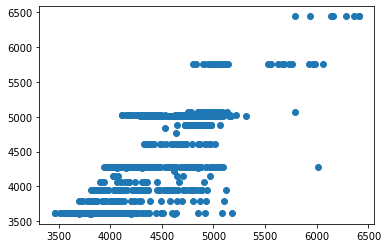

In [65]:
plt.scatter(data_val['labels'][:,0],c)

I think we can agree- this is not so great. But it is also not nothing? We have predicted new labels which are totally reasonable if not stratified. The real values plotted against the predicted values are close to the line y = x (broadly, loosely, casually... speaking). That's something! Thanks for a great course, Hogg. Even if the last two homeworks were lackluster, I defintiely learned useful things in this class than I learned in any course ever. I'm excited to have yet another way of thinking about the world. 

All the best always,
Matt Gronert